In [1]:
import numpy
import sympy
sympy.init_printing()

(u_max, u_star, rho_max, rho_star, A,B) = sympy.symbols('u_max u_star rho_max rho_star A B')


In [2]:
eq1 = sympy.Eq( 0, u_max*rho_max*(1 - A*rho_max-B*rho_max**2) )
eq2 = sympy.Eq( 0, u_max*(1 - 2*A*rho_star-3*B*rho_star**2) )
eq3 = sympy.Eq( u_star, u_max*(1 - A*rho_star - B*rho_star**2) )

In [3]:
eq1

In [4]:
eq2

In [5]:
eq3

In [6]:
eq2 - 3*eq3

In [7]:
eq4 = sympy.Eq(eq2.lhs - 3*eq3.lhs, eq2.rhs - 3*eq3.rhs)
eq4

In [8]:
eq4.simplify()

In [9]:
eq4

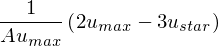

In [10]:
rho_sol = sympy.solve(eq4,rho_star)[0]
rho_sol

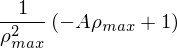

In [11]:
B_sol = sympy.solve(eq1,B)[0]
B_sol

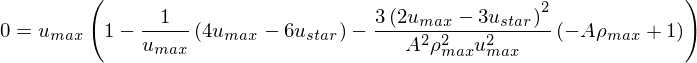

In [12]:
quadA = eq2.subs([(rho_star, rho_sol), (B,B_sol)])
quadA

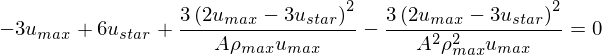

In [13]:
quadA.simplify()

In [14]:
A_sol = sympy.solve(quadA, A)

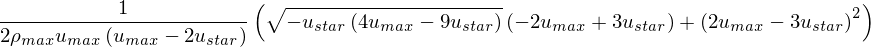

In [15]:
A_sol[0]

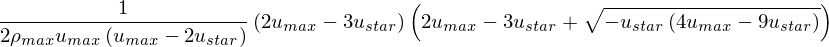

In [16]:
A_sol[1]

In [17]:
aval_a = A_sol[0].evalf(subs={u_star: 1.5, u_max:2.0, rho_max:15.0} )
aval_a

In [18]:
aval_b = A_sol[1].evalf(subs={u_star: 1.5, u_max:2.0, rho_max:15.0} )
aval_b

In [19]:
if aval_a > aval_b:
    aval = aval_a
else:
    aval = aval_b


In [20]:
aval

In [21]:
bval = B_sol.evalf(subs={rho_max:15.0, A:aval} )
bval

In [22]:
sympy.init_printing(use_latex=False)

In [23]:
rho_max = 15.
u_max = 2.

In [24]:
def computeF(u_max, rho, aval, bval):
    return u_max*rho*(1 - aval*rho-bval*rho**2)

In [25]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [26]:
def rho_green_light(nx, rho_light):
   
    rho_initial = numpy.arange(nx)*2./nx*rho_light  # Before stoplight
    rho_initial[int((nx-1)/2):] = 0
    
    return rho_initial

In [32]:
nx = 81
nt = 30
dx = 4.0/(nx-1)

x = numpy.linspace(0,4,nx)

rho_light = 5

In [33]:
rho_initial = rho_green_light(nx, rho_light)
rho_initial.max()

4.81481481481

In [34]:
def ftbs(rho, nt, dt, dx, rho_max, u_max):
    
    #initialize our results array with dimensions nt by nx
    rho_n = numpy.zeros((nt,len(rho))) 
    
    #copy the initial u array into each row of our new array
    rho_n[0,:] = rho.copy()              
    
    for t in range(1,nt):
        F = computeF(u_max, rho, aval, bval)
        rho_n[t,1:] = rho[1:] - dt/dx*(F[1:]-F[:-1])
        rho_n[t,0] = rho[0]
        rho_n[t,-1] = rho[-1]
        rho = rho_n[t].copy()

    return rho_n

In [35]:
sigma = 1.
dt = sigma*dx/u_max

rho_n = ftbs(rho_initial, nt, dt, dx, rho_max, u_max)

In [36]:
print(rho_n.max())

4.81481481481
